# Pruebas DTW

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

Se definen las sequencias

In [3]:
sequence1 = [0,1,2,1,3,4,3,2,1,0]
sequence2 = [1,4,0,0,1,2,2,4,3,0]

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

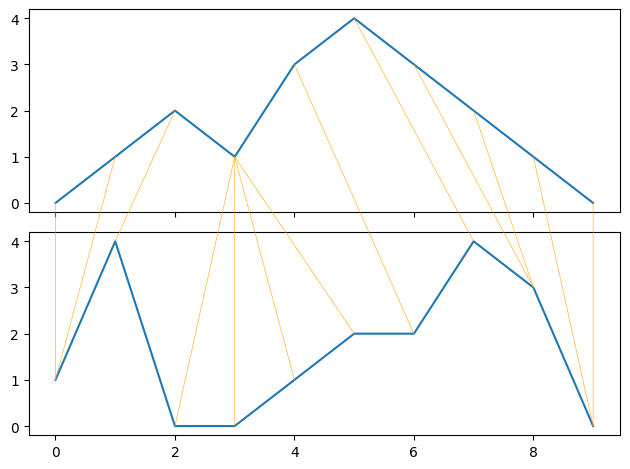

In [4]:
path = dtw.warping_path(sequence1, sequence2)
dtwvis.plot_warping(sequence1, sequence2, path, filename="warp.png")
dtwvis.plot_warping(sequence1, sequence2, path)

In [5]:
distance = dtw.distance(sequence1, sequence2)
print(distance)

3.3166247903554


In [6]:
distance, paths = dtw.warping_paths(sequence1, sequence2)
print("Distance =", distance)
best_path = dtw.best_path(paths)
print("best path =",best_path)
#np.set_printoptions(precision=3)
print(paths)

Distance = 3.3166247903554
best path = [(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 8), (8, 9), (9, 9)]
[[0.                inf        inf        inf        inf        inf
         inf        inf        inf        inf        inf]
 [       inf 1.         4.12310563 4.12310563 4.12310563 4.24264069
  4.69041576 5.09901951 6.4807407  7.14142843 7.14142843]
 [       inf 1.         3.16227766 3.31662479 3.46410162 3.46410162
  3.60555128 3.74165739 4.79583152 5.19615242 5.29150262]
 [       inf 1.41421356 2.23606798 3.         3.60555128 3.60555128
  3.46410162 3.46410162 4.         4.12310563 4.58257569]
 [       inf 1.41421356 3.31662479 2.44948974 2.64575131 2.64575131
  2.82842712 3.         4.24264069 4.47213595 4.24264069]
 [       inf 2.44948974 1.73205081 3.46410162 3.87298335 3.31662479
  2.82842712 3.         3.16227766 3.16227766 4.35889894]
 [       inf 3.87298335 1.73205081 4.35889894 5.29150262 4.47213595
  3.46410162 3.46410162 3.      

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

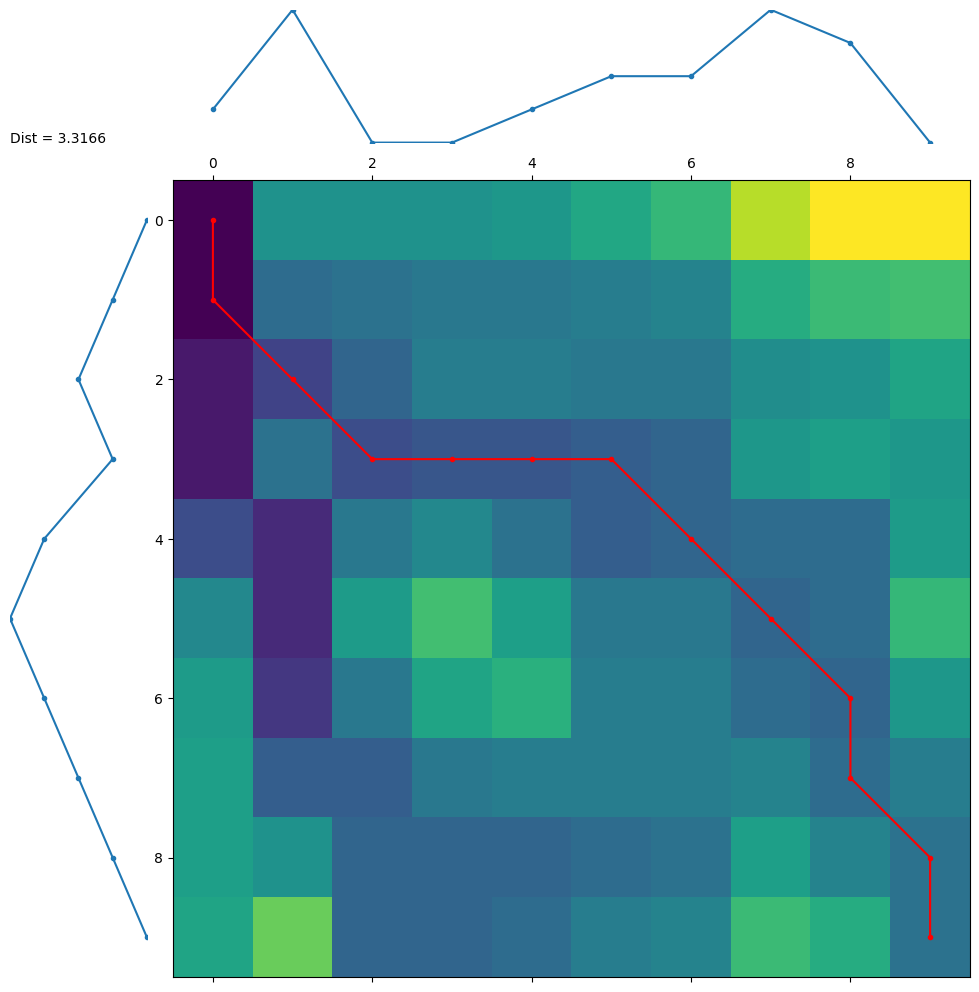

In [7]:
sequence1 = np.array(sequence1)
sequence2 = np.array(sequence2)
dtwvis.plot_warpingpaths(sequence1, sequence2, paths, best_path)

Pruebas comparando dos secuencias normalizadas y sin normalizar

[  0  30 180  45  30 360 270 200 180   0]
[180  45  35 350 271 200 200  40 380   0]


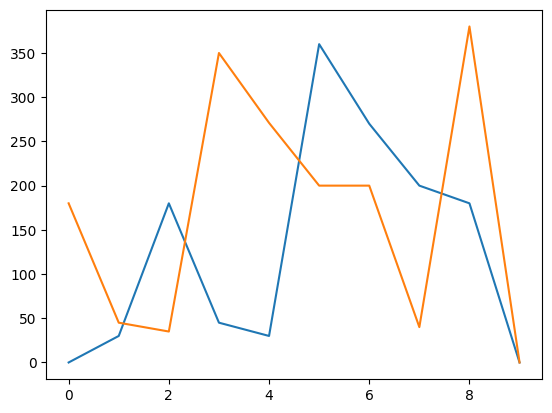

In [8]:
sequence1 = [0,30,180,45,30,360,270,200,180,0]
sequence2 = [180,45,35,350,271,200,200,40,380,0]
sequence1 = np.array(sequence1)
sequence2 = np.array(sequence2)

print(sequence1)
print(sequence2)

plt.plot(sequence1)
plt.plot(sequence2)
plt.show()


557.7858011817798
normalizaed
[0.         0.05378409 0.32270452 0.08067613 0.05378409 0.64540904
 0.48405678 0.35856058 0.32270452 0.        ]
[0.26609319 0.0665233  0.05174034 0.51740343 0.40061809 0.29565911
 0.29565911 0.05913182 0.5617523  0.        ]


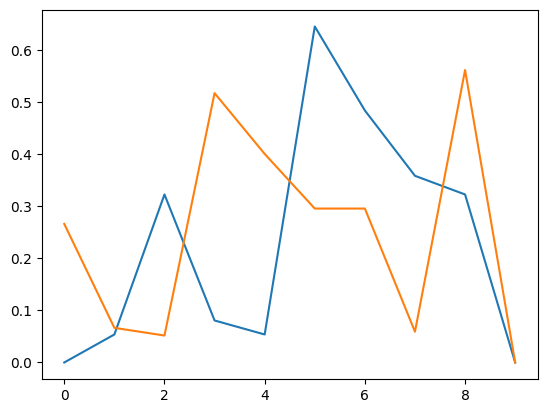

In [9]:
normalize = lambda angles :  angles/np.linalg.norm(angles)

print(np.linalg.norm(sequence1))

normalized_sequence1 = normalize(sequence1)
normalized_sequence2 = normalize(sequence2)

normalized_distance, normalized_paths = dtw.warping_paths(normalized_sequence1, normalized_sequence2)
normalized_best_path = dtw.best_path(normalized_paths)

print("normalizaed")
print(normalized_sequence1)
print(normalized_sequence2)

plt.plot(normalized_sequence1)
plt.plot(normalized_sequence2)
plt.show()



En el caso de los angulos, al ser valores entre 0º y 360º, se podrian normalizar dividiendolos entre 360º.

normalizaed
[0.         0.08333333 0.5        0.125      0.08333333 1.
 0.75       0.55555556 0.5        0.        ]
[0.5        0.125      0.09722222 0.97222222 0.75277778 0.55555556
 0.55555556 0.11111111 1.05555556 0.        ]


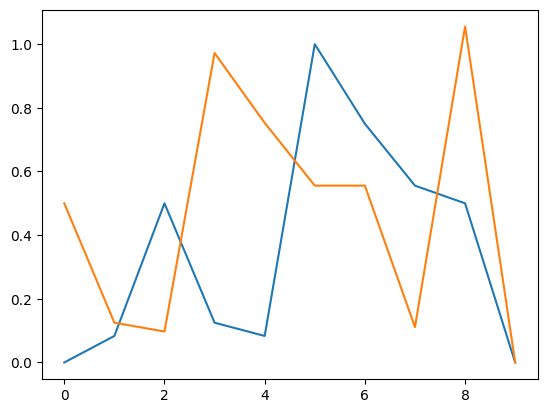

In [10]:
normalize_angles = lambda angles :  angles/360

normalized_angles_sequence1 = normalize_angles(sequence1)
normalized_angles_sequence2 = normalize_angles(sequence2)

normalized_angles_distance, normalized_angles_paths = dtw.warping_paths(normalized_angles_sequence1, normalized_angles_sequence2)
normalized_angles_best_path = dtw.best_path(normalized_angles_paths)

print("normalizaed")
print(normalized_angles_sequence1)
print(normalized_angles_sequence2)

plt.plot(normalized_angles_sequence1)
plt.plot(normalized_angles_sequence2)
plt.show()


In [11]:
print("Distance =", distance)
print("best path =",best_path)
#print(paths)

print("Distance =", normalized_distance)
print("best path =",normalized_best_path)
#print(normalized_paths)

print("Distance =", normalized_angles_distance)
print("best path =",normalized_angles_best_path)


Distance = 3.3166247903554
best path = [(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 8), (8, 9), (9, 9)]
Distance = 0.4778824838421966
best path = [(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 7), (4, 7), (5, 8), (6, 8), (7, 8), (8, 8), (9, 9)]
Distance = 0.9236936053384855
best path = [(0, 0), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (6, 4), (7, 5), (7, 6), (8, 7), (8, 8), (9, 9)]


In [12]:
sequence1 = [1,2,3,4]
sequence2 = [1,2,3,4]
distance = dtw.distance(sequence1, sequence2)
print(distance)

sequence1 = [0,1,2,3]
sequence2 = [4,5,2,3]
distance = dtw.distance(sequence1, sequence2)
print(distance)

sequence1 = [0,1,2,3]
sequence2 = [2,3,2,3]
distance = dtw.distance(sequence1, sequence2)
print(distance)

sequence1 = [0,1,2,0]
sequence2 = [2,1,2,1]
distance = dtw.distance(sequence1, sequence2)
print(distance)


0.0
5.656854249492381
2.449489742783178
2.23606797749979


# Pruebas con FastDTW

In [13]:
import time
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [14]:
sequence1 = [0,30,180,45,30,360,270,200,180,0]
sequence2 = [180,45,35,350,271,200,200,40,380,0]

sequence1 = np.array(sequence1, dtype=np.double)
sequence2 = np.array(sequence2, dtype=np.double)

In [15]:
start = time.time()
fast_distance, fast_path = fastdtw(sequence1, sequence2, radius=2)
end = time.time()

print(fast_distance)
print(end-start)


686.0
0.0005917549133300781


In [16]:
start = time.time()
distance, path = dtw.warping_paths_fast(sequence1, sequence2)
end = time.time()

print(distance)
print(end-start)


332.5296979218548
0.00038361549377441406


In [17]:
import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw

x = np.array([[1,1], [2,2], [3,3], [4,4], [5,5]])
y = np.array([[2,2], [3,3], [4,4]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.8284271247461903
